       Date     Hour  SEA FIS Checkpoint  SEA SCP 2  SEA SCP 3  SEA SCP 4  \
0  1/1/2021  0:00:00                 NaN        NaN         33        NaN   
1  1/1/2021  1:00:00                 NaN        NaN         11        NaN   
2  1/1/2021  2:00:00                 NaN        NaN          9        NaN   
3  1/1/2021  3:00:00                 NaN        NaN         97        NaN   
4  1/1/2021  4:00:00                 NaN      122.0        184      160.0   

   SEA SCP 5  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4       87.0  
        Date      Hour  SEA FIS Checkpoint  SEA SCP 2  SEA SCP 3  SEA SCP 4  \
0   1/1/2021   0:00:00                 NaN        NaN         33        NaN   
1   1/1/2021   1:00:00                 NaN        NaN         11        NaN   
2   1/1/2021   2:00:00                 NaN        NaN          9        NaN   
3   1/1/2021   3:00:00                 NaN        NaN         97        NaN   
4   1/1/2021   4:00:00                 NaN      122.

(-0.5, 31.0)

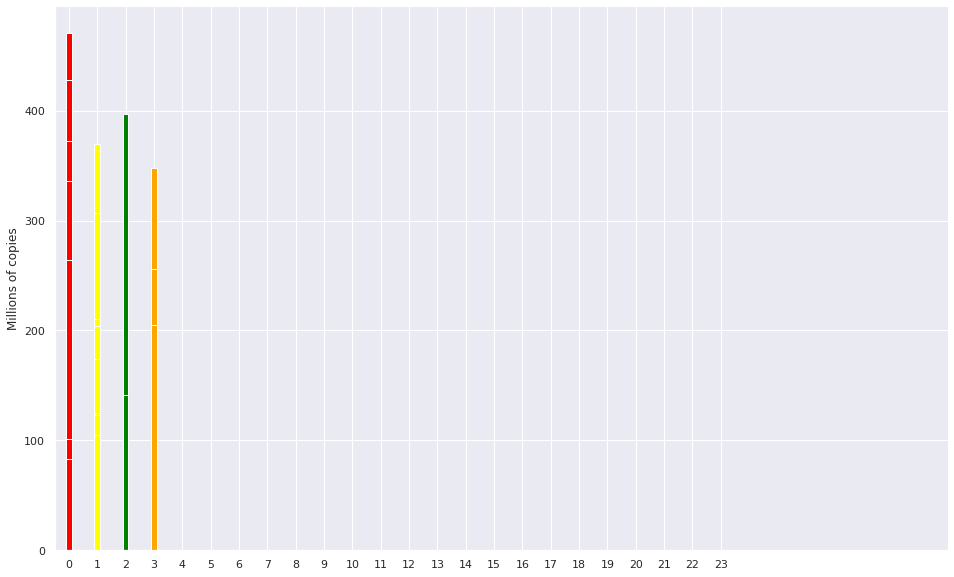

In [6]:
import matplotlib.animation as ani
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pandas as pd
import seaborn as sns 


# Load the file into a dataframe and checkout the structure
projectDir = Path('.').resolve().parents[2]
df = pd.read_csv(f'{projectDir}/data/processed/tsa/throughput/2021.TsaThroughput.SEA.csv')
df = df.rename(columns = {'Airports.Days.Date' : 'Date'}, inplace=False)
print(df.head())


dfDay = df[df.Date.eq('1/1/2021')]

print(dfDay)
sns.set(style='darkgrid')

# Setup Plotting Area
fig, ax = plt.subplots(figsize=(16, 10))
ax.set(xlim=(0, len(dfDay.index)), ylim=(0, 2000)


# numerical x (hours)
x = np.arange(0, len(dfDay.index))
print(len(dfDay.index), x)


fields = ['SEA FIS Checkpoint', 'SEA SCP 2', 'SEA SCP 3', 'SEA SCP 4', 'SEA SCP 5']
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748', '#FADEA7']
labels = ['FIS', 'SCP2', 'SCP3', 'SCP4', 'SCP5']

# plot barsf
plt.bar(fields[4], dfDay['SEA SCP 5'],          width = 0.2, color = 'red')
plt.bar(fields[3], dfDay['SEA SCP 4'],          width = 0.2, color = 'yellow')
plt.bar(fields[2], dfDay['SEA SCP 3'],          width = 0.2, color = 'green')
plt.bar(fields[1], dfDay['SEA SCP 2'],          width = 0.2, color = 'orange')
plt.bar(fields[0], dfDay['SEA FIS Checkpoint'], width = 0.2, color = 'blue')

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# x y details
plt.ylabel('Millions of copies')
plt.xticks(x, dfDay.index)
plt.xlim(-0.5, 31)


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.animation as ani
from pathlib import Path

# Load the file into a dataframe and checkout the structure
projectDir = Path('.').resolve().parents[2]
df = pd.read_csv(f'{projectDir}/data/processed/tsa/throughput/2021.TsaThroughput.SEA.csv', header='infer')
df = df.rename(columns = {'Airports.Days.Date' : 'Date', 'SEA FIS Checkpoint' : 'SEA FIS'}, inplace=False)
df.Date = pd.to_datetime(df['Date'])
dfg = df.groupby('Date', as_index=False).agg({"SEA SCP 3": "sum"})
print(dfg.head())


#fig = plt.figure()
fig, ax = plt.subplots(figsize=(16, 10), dpi=900)
plt.xticks(rotation=45, ha="right", rotation_mode="anchor") #rotate the x-axis values
plt.subplots_adjust(bottom = 0.2, top = 0.9) #ensuring the dates (on the x-axis) fit in the screen
plt.ylabel('Amount')
plt.xlabel('Dates')

def buildchart(i = int):
	p = plt.plot(dfg.loTrue[:i,'Date'], dfg.loc[:i, 'SEA SCP 3'])
	for i in range(0, 1):
		p[i].set_color('red')

plt.subplots(figsize=(16, 10))
animation = ani.FuncAnimation(fig, buildchart, interval=1000)

Writer = ())
writer = Writer(fps=15, metadata={artist:'O'}, bitrate=900)

animation.save(r'/mnt/c/tmp/animation.gif',  writer=writer, dpi=900)
plt.show()

       Date     Hour  SEA FIS Checkpoint  SEA SCP 2  SEA SCP 3  SEA SCP 4  \
0  1/1/2021  0:00:00                 NaN        NaN         33        NaN   
1  1/1/2021  1:00:00                 NaN        NaN         11        NaN   
2  1/1/2021  2:00:00                 NaN        NaN          9        NaN   
3  1/1/2021  3:00:00                 NaN        NaN         97        NaN   
4  1/1/2021  4:00:00                 NaN      122.0        184      160.0   

   SEA SCP 5  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4       87.0  
MovieWriter stderr:
Error writing trailer of /mnt/c/tmp/animation.gif: Invalid argument



CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '432x288', '-pix_fmt', 'rgba', '-r', '100.0', '-loglevel', 'error', '-i', 'pipe:', '-filter_complex', 'split [a][b];[a] palettegen [p];[b][p] paletteuse', '-y', '/mnt/c/tmp/animation.gif']' returned non-zero exit status 255.

In [102]:
import matplotlib.animation as ani
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
df = pd.read_csv(url, delimiter=',', header='infer')
df_interest = df.loc[
    df['Country/Region'].isin(['United Kingdom', 'US', 'Italy', 'Germany'])
    & df['Province/State'].isna()]
df_interest.rename(
    index=lambda x: df_interest.at[x, 'Country/Region'], inplace=True)
df1 = df_interest.transpose()
df1 = df1.drop(['Province/State', 'Country/Region', 'Lat', 'Long'])
df1 = df1.loc[(df1 != 0).any(1)]
df1.index = pd.to_datetime(df1.index)

print(df1)

color = ['red', 'green', 'blue', 'orange']
fig = plt.figure(figsize=(25, 5), antialiased=True)
plt.xticks(rotation=45, ha="right", rotation_mode="anchor") #rotate the x-axis values
plt.subplots_adjust(bottom = 0.2, top = 0.9) #ensuring the dates (on the x-axis) fit in the screen
plt.ylabel('No of Deaths')
plt.xlabel('Dates')

def buildmebarchart(i=int):
    plt.legend(df1.columns)
    p = plt.plot(df1[:i].index, df1[:i].values) #note it only returns the dataset, up to the point i
    for i in range(0,4):
        p[i].set_color(color[i]) #set the colour of each curve
import matplotlib.animation as ani
animator = ani.FuncAnimation(fig, buildmebarchart, interval = 100)
animator.save(r'/mnt/c/tmp/myfirstAnimation.gif', 'imagemagick')
plt.show()


           Germany   Italy      US United Kingdom
2020-02-21       0       1       0              0
2020-02-22       0       2       0              0
2020-02-23       0       3       0              0
2020-02-24       0       7       0              0
2020-02-25       0      10       0              0
...            ...     ...     ...            ...
2021-03-07   71984   99785  525041         124501
2021-03-08   72236  100103  525762         124566
2021-03-09   72534  100479  527710         124797
2021-03-10   72858  100811  529264         124987
2021-03-11   73120  101184  530821         125168

[385 rows x 4 columns]
/home/mlorengo/.virtualenvs/tsathroughput/lib/python3.8/site-packages/pandas/core/frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


TypeError: __init__() got an unexpected keyword argument 'antialiased'